In [1]:
from knn import evaluate_knn
from read_cifar import read_cifar, split_dataset
import matplotlib.pyplot as plt


# Read and split the dataset
data, labels = read_cifar('data')
train_data, train_labels, test_data, test_labels = split_dataset(data, labels, 0.9)

# KNN test

In [2]:

# Evaluate KNN for different values of k and store the accuracies
k_values = range(1, 21)
accuracies = []

for k in k_values:
    print(k)
    accuracy = evaluate_knn(train_data, train_labels, test_data, test_labels, k)
    accuracies.append(accuracy)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


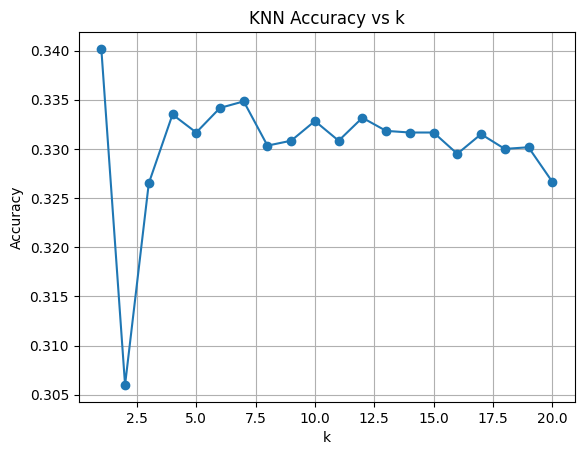

In [3]:
# Plot the results
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy vs k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('results/knn.png')
plt.show()

If we don't take into account the case for k = 1, the best value of k is 5, because with larger k, the accuracy doesn't improve.

We reach an accuracy of approxiamtely 0.335 for the k-NN model.

# MLP test

In [1]:
from read_cifar import read_cifar, split_dataset


# Read and split the dataset
data, labels = read_cifar('data')
train_data, train_labels, test_data, test_labels = split_dataset(data, labels, 0.9)

In [2]:
import matplotlib.pyplot as plt
from mlp import run_mlp_training

# Set parameters
d_h = 1024
learning_rate = 0.01
num_epoch = 100

# Run the MLP training
train_accuracies, test_accuracy = run_mlp_training(train_data, train_labels, test_data, test_labels, d_h, learning_rate, num_epoch)

Training the MLP...


Training Progress: 100%|██████████| 100/100 [23:06<00:00, 13.86s/it]


test accuracy 0.21066666666666667


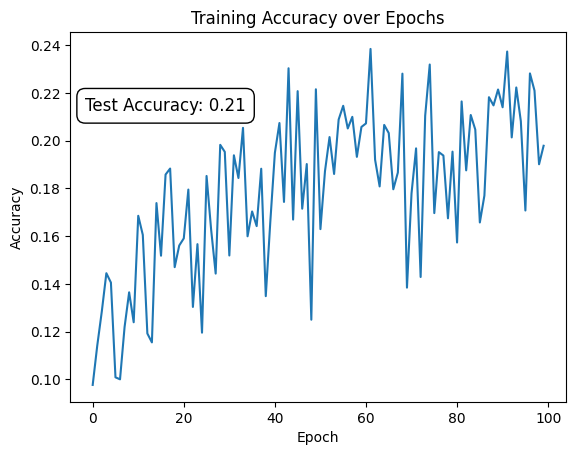

In [11]:
print('test accuracy', test_accuracy)

# Plot the evolution of learning accuracy
plt.figure()
plt.plot(range(num_epoch), train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.text(num_epoch * 0.16, max(train_accuracies) * 0.9,  # Position relative to data range
         f'Test Accuracy: {test_accuracy:.2f}', 
         ha='center', va='center', fontsize=12,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.savefig('results/mlp.png')
plt.show()

The accuracy reached for the MLP model during testing is 0.21.

We can conclude that our implementation of the k-NN model is better that the MLP model.